In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "nsl_kdd"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import time
from data_utils import *
from umap import UMAP


from data_utils import load_train_test_data
from src.feature_extraction import CategoricalExtractor

import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

# Load data

In [3]:
(X_train, X_test, Y_train, Y_test), attack_classes = load_train_test_data(pwd=pwd, return_classes=True, standardize=True, norm=False, include_categorical=True)

In [4]:
X_all = np.vstack([X_train, X_test])
Y_all = np.vstack([Y_train, Y_test])

X_train.shape, X_test.shape, X_all.shape

((125973, 122), (22544, 122), (148517, 122))

In [5]:
y_train = np.argmax(Y_train, axis=1)
y_test = np.argmax(Y_test, axis=1)
y_all = np.argmax(Y_all, axis=1)

# Utils

In [6]:
def plot_visualisation(X, y, title=None, labels=None, s=15, legend=True):
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10', s=s)
    plt.title(title)
    
    handles, classes = scatter.legend_elements()
    if labels is not None:
        classes = labels
    if legend:
        plt.legend(handles, classes)

# Visualisation (n=8)

In [7]:
extractor = CategoricalExtractor(8, root=pwd)

X_extracted_train = extractor.extract_features(X_train)
X_extracted_test = extractor.extract_features(X_test)
X_extracted_all = extractor.extract_features(X_all)

X_extracted_train.shape, X_extracted_test.shape, X_extracted_all.shape

((125973, 8), (22544, 8), (148517, 8))

In [8]:
N = None

## Default

In [9]:
umap_train = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_test = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_all = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)

print('Running train')
# X_train_umap = run_and_measure(umap_train.fit_transform, X_train[:N])
# np.save(pwd + '/data/saved_X_test_set_experiments/X_train_umap.npy', np.array(X_train_umap))
X_train_umap = np.load(pwd + '/data/saved_X_test_set_experiments/X_train_umap.npy')[:N]

print('Running test')
# X_test_umap = run_and_measure(umap_test.fit_transform, X_test[:N])
# np.save(pwd + '/data/saved_X_test_set_experiments/X_test_umap.npy', np.array(X_test_umap))
X_test_umap = np.load(pwd + '/data/saved_X_test_set_experiments/X_test_umap.npy')[:N]

print('Running all')
# X_all_umap = run_and_measure(umap_all.fit_transform, X_all[:N])
# np.save(pwd + '/data/saved_X_test_set_experiments/X_all_umap.npy', np.array(X_all_umap))
X_all_umap = np.load(pwd + '/data/saved_X_test_set_experiments/X_all_umap.npy')[:N]

Running train
Running test
Running all


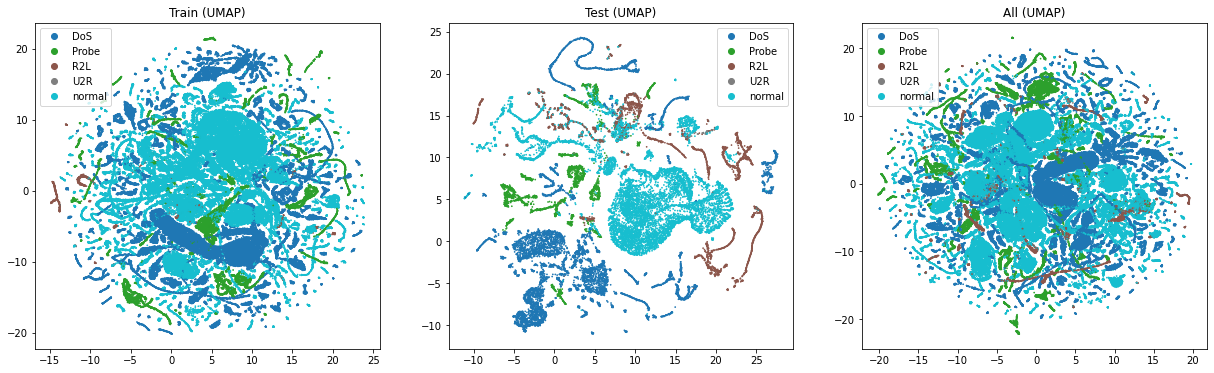

In [10]:
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plot_visualisation(X_train_umap, y_train[:N], title='Train (UMAP)', labels=attack_classes, s=0.5)
plt.subplot(1, 3, 2)
plot_visualisation(X_test_umap, y_test[:N], title='Test (UMAP)', labels=attack_classes, s=0.5)
plt.subplot(1, 3, 3)
plot_visualisation(X_all_umap, y_all[:N], title='All (UMAP)', labels=attack_classes, s=0.5)

plt.show()

## Extracted

In [11]:
umap_extracted_train = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_extracted_test = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_extracted_all = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)

print('Running train')
# X_train_extracted_umap = run_and_measure(umap_extracted_train.fit_transform, X_train[:N])
# np.save(pwd + '/data/saved_X_test_set_experiments/X_train_extracted_umap.npy', np.array(X_train_extracted_umap))
X_train_extracted_umap = np.load(pwd + '/data/saved_X_test_set_experiments/X_train_extracted_umap.npy')[:N]

print('Running test')
# X_test_extracted_umap = run_and_measure(umap_extracted_test.fit_transform, X_test[:N])
# np.save(pwd + '/data/saved_X_test_set_experiments/X_test_extracted_umap.npy', np.array(X_test_extracted_umap))
X_test_extracted_umap = np.load(pwd + '/data/saved_X_test_set_experiments/X_test_extracted_umap.npy')[:N]

print('Running all')
# X_all_extracted_umap = run_and_measure(umap_extracted_all.fit_transform, X_all[:N])
# np.save(pwd + '/data/saved_X_test_set_experiments/X_all_extracted_umap.npy', np.array(X_all_extracted_umap))
X_all_extracted_umap = np.load(pwd + '/data/saved_X_test_set_experiments/X_all_extracted_umap.npy')[:N]

Running train
Running test
Running all


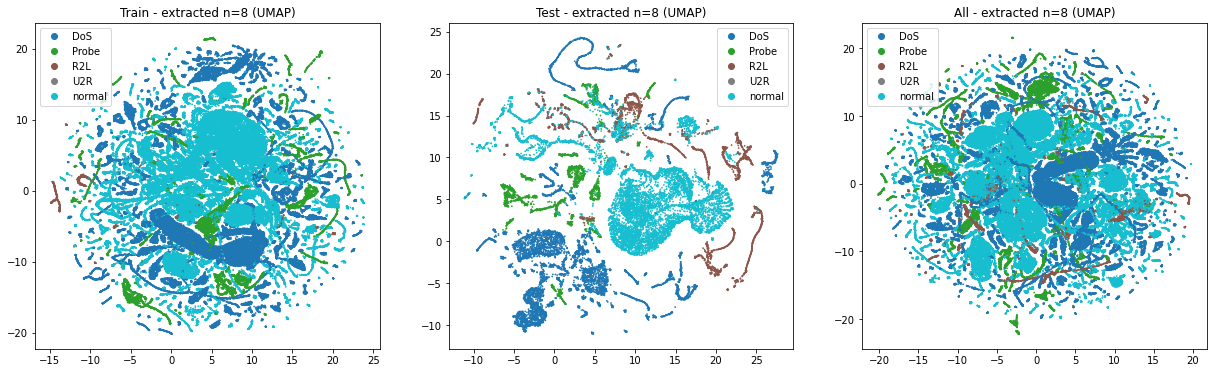

In [12]:
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plot_visualisation(X_train_extracted_umap, y_train[:N], title='Train - extracted n=8 (UMAP)', labels=attack_classes, s=0.5)
plt.subplot(1, 3, 2)
plot_visualisation(X_test_extracted_umap, y_test[:N], title='Test - extracted n=8 (UMAP)', labels=attack_classes, s=0.5)
plt.subplot(1, 3, 3)
plot_visualisation(X_all_extracted_umap, y_all[:N], title='All - extracted n=8 (UMAP)', labels=attack_classes, s=0.5)

plt.show()

## Part of the dataset - default

In [13]:
N_part = 20000

In [14]:
umap_train = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_test = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_all = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)

print('Running train')
X_train_umap = run_and_measure(umap_train.fit_transform, X_train[:N_part])
print('Running test')
X_test_umap = run_and_measure(umap_test.fit_transform, X_test[:N_part])
print('Running all')
X_all_umap = run_and_measure(umap_all.fit_transform, X_all[:N_part])

Running train
44.77 s
Running test
31.11 s
Running all
30.80 s


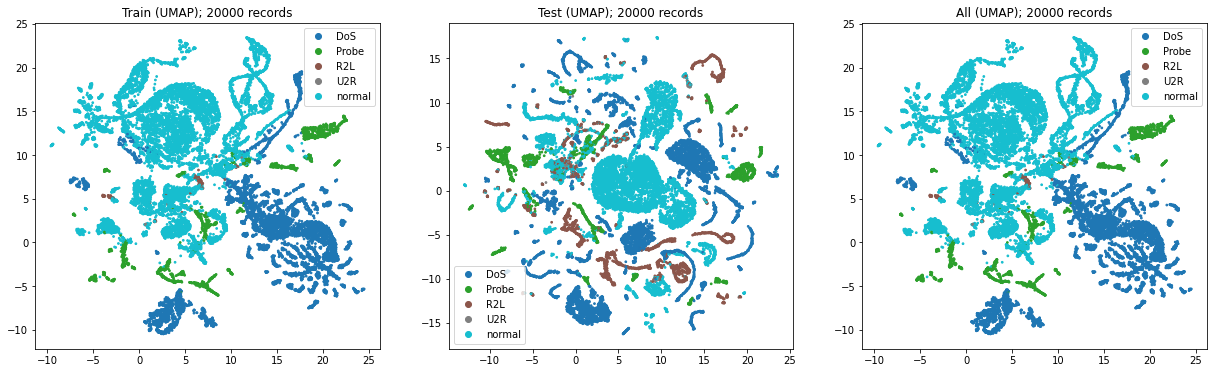

In [15]:
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plot_visualisation(X_train_umap, y_train[:N_part], title=f'Train (UMAP); {N_part} records', labels=attack_classes, s=3)
plt.subplot(1, 3, 2)
plot_visualisation(X_test_umap, y_test[:N_part], title=f'Test (UMAP); {N_part} records', labels=attack_classes, s=3)
plt.subplot(1, 3, 3)
plot_visualisation(X_all_umap, y_all[:N_part], title=f'All (UMAP); {N_part} records', labels=attack_classes, s=3)

plt.show()

## Part of the dataset - extracted

In [16]:
umap_extracted_train = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_extracted_test = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_extracted_all = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)

print('Running train')
X_train_extracted_umap = run_and_measure(umap_extracted_train.fit_transform, X_train[:N_part])
print('Running test')
X_test_extracted_umap = run_and_measure(umap_extracted_test.fit_transform, X_test[:N_part])
print('Running all')
X_all_extracted_umap = run_and_measure(umap_extracted_all.fit_transform, X_all[:N_part])

Running train
31.00 s
Running test
32.05 s
Running all
29.42 s


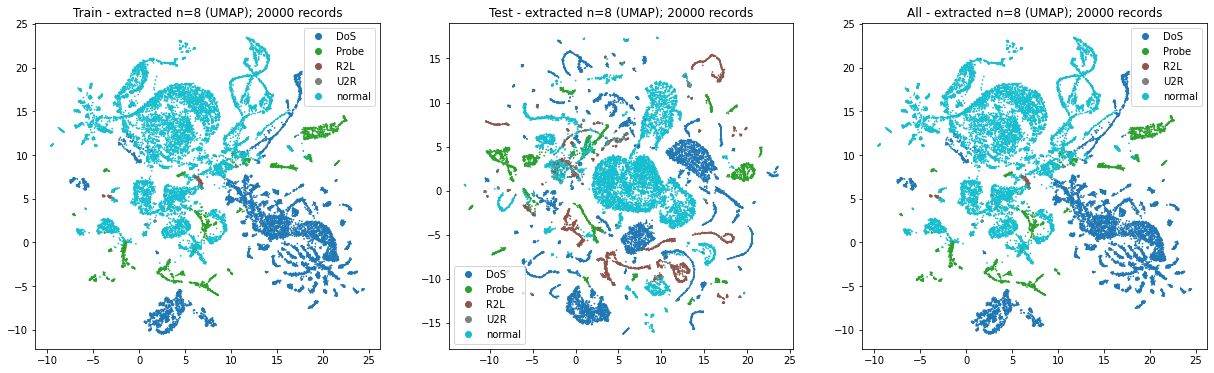

In [17]:
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plot_visualisation(X_train_extracted_umap, y_train[:N_part], title=f'Train - extracted n=8 (UMAP); {N_part} records', labels=attack_classes, s=0.5)
plt.subplot(1, 3, 2)
plot_visualisation(X_test_extracted_umap, y_test[:N_part], title=f'Test - extracted n=8 (UMAP); {N_part} records', labels=attack_classes, s=0.5)
plt.subplot(1, 3, 3)
plot_visualisation(X_all_extracted_umap, y_all[:N_part], title=f'All - extracted n=8 (UMAP); {N_part} records', labels=attack_classes, s=0.5)

plt.show()

# Visualisation (n=2)

In [18]:
extractor = CategoricalExtractor(2, root=pwd)

X_extracted_train = extractor.extract_features(X_train)
X_extracted_test = extractor.extract_features(X_test)
X_extracted_all = extractor.extract_features(X_all)

X_extracted_train.shape, X_extracted_test.shape, X_extracted_all.shape

((125973, 2), (22544, 2), (148517, 2))

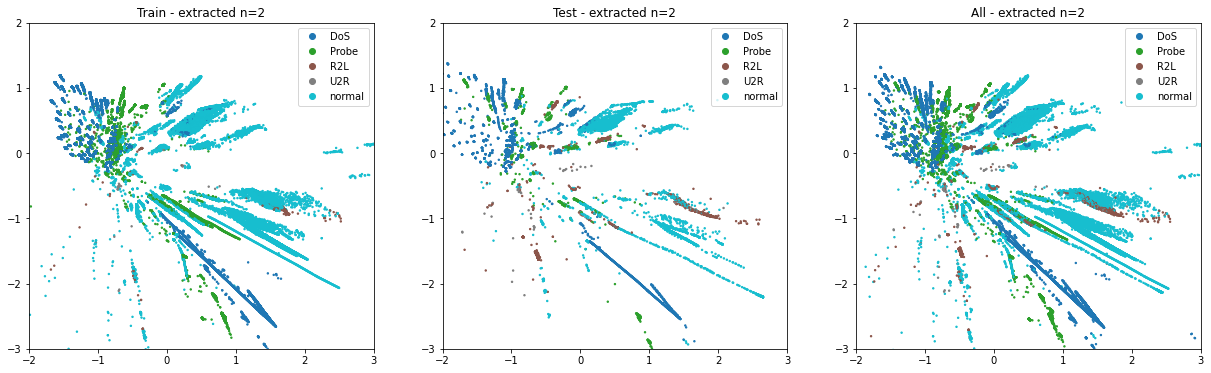

In [19]:
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plot_visualisation(X_extracted_train[:N], y_train[:N], title='Train - extracted n=2', labels=attack_classes, s=2)
plt.xlim(-2, 3)
plt.ylim(-3, 2)
plt.subplot(1, 3, 2)
plot_visualisation(X_extracted_test[:N], y_test[:N], title='Test - extracted n=2', labels=attack_classes, s=2)
plt.xlim(-2, 3)
plt.ylim(-3, 2)
plt.subplot(1, 3, 3)
plot_visualisation(X_extracted_all[:N], y_all[:N], title='All - extracted n=2', labels=attack_classes, s=2)
plt.xlim(-2, 3)
plt.ylim(-3, 2)

plt.show()

In [20]:
umap_extracted_train = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_extracted_test = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)
umap_extracted_all = UMAP(n_components=2, n_neighbors=60, min_dist=0.6, random_state=42, low_memory=False)

print('Running train')
# X_train_extracted_umap = run_and_measure(umap_extracted_train.fit_transform, X_train[:N])
# np.save(pwd + '/data/saved_X_test_set_experiments/n2_X_train_extracted_umap.npy', np.array(X_train_extracted_umap))
X_train_extracted_umap = np.load(pwd + '/data/saved_X_test_set_experiments/n2_X_train_extracted_umap.npy')[:N]

print('Running test')
# X_test_extracted_umap = run_and_measure(umap_extracted_test.fit_transform, X_test[:N])
# np.save(pwd + '/data/saved_X_test_set_experiments/n2_X_test_extracted_umap.npy', np.array(X_test_extracted_umap))
X_test_extracted_umap = np.load(pwd + '/data/saved_X_test_set_experiments/n2_X_test_extracted_umap.npy')[:N]

print('Running all')
# X_all_extracted_umap = run_and_measure(umap_extracted_all.fit_transform, X_all[:N])
# np.save(pwd + '/data/saved_X_test_set_experiments/n2_X_all_extracted_umap.npy', np.array(X_all_extracted_umap))
X_all_extracted_umap = np.load(pwd + '/data/saved_X_test_set_experiments/n2_X_all_extracted_umap.npy')[:N]

Running train
Running test
Running all


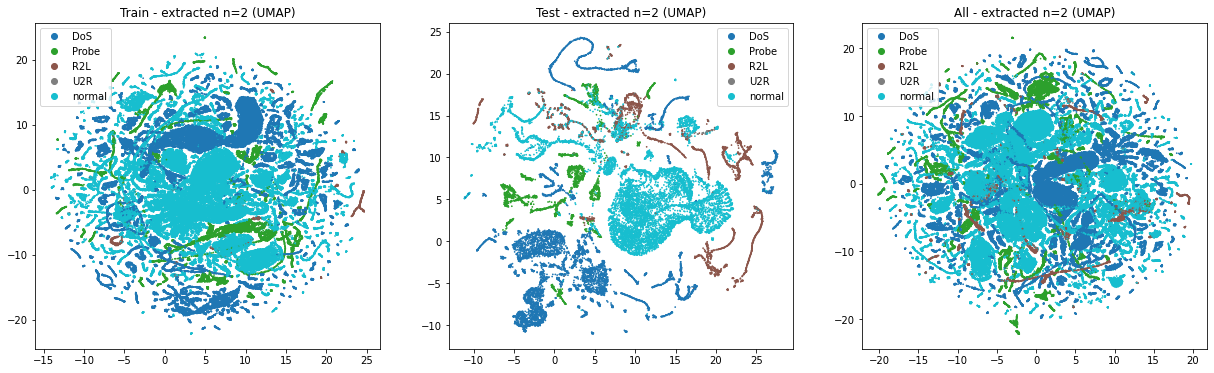

In [21]:
plt.figure(figsize=(21, 6))

plt.subplot(1, 3, 1)
plot_visualisation(X_train_extracted_umap, y_train[:N], title='Train - extracted n=2 (UMAP)', labels=attack_classes, s=0.5)
plt.subplot(1, 3, 2)
plot_visualisation(X_test_extracted_umap, y_test[:N], title='Test - extracted n=2 (UMAP)', labels=attack_classes, s=0.5)
plt.subplot(1, 3, 3)
plot_visualisation(X_all_extracted_umap, y_all[:N], title='All - extracted n=2 (UMAP)', labels=attack_classes, s=0.5)

plt.show()